In [1]:
import albumentations as A
import cv2
from PIL import Image
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
# Declare an augmentation pipeline
transform = A.Compose([
    # A.RandomCrop(width=256, height=256),
    # A.HorizontalFlip(p=0.5),
    # A.RandomBrightnessContrast(p=0.2),
    A.RandomFog(fog_coef_lower=0.1),
    A.RandomRain(),
    A.RandomSnow(),

    A.Blur(p=0.01),
    A.MedianBlur(p=0.01),
    A.ToGray(p=0.01),
    A.CLAHE(p=0.01),
    A.RandomBrightnessContrast(p=0.0),
    A.RandomGamma(p=0.0),
    A.ImageCompression(quality_lower=75, p=0.0),

])

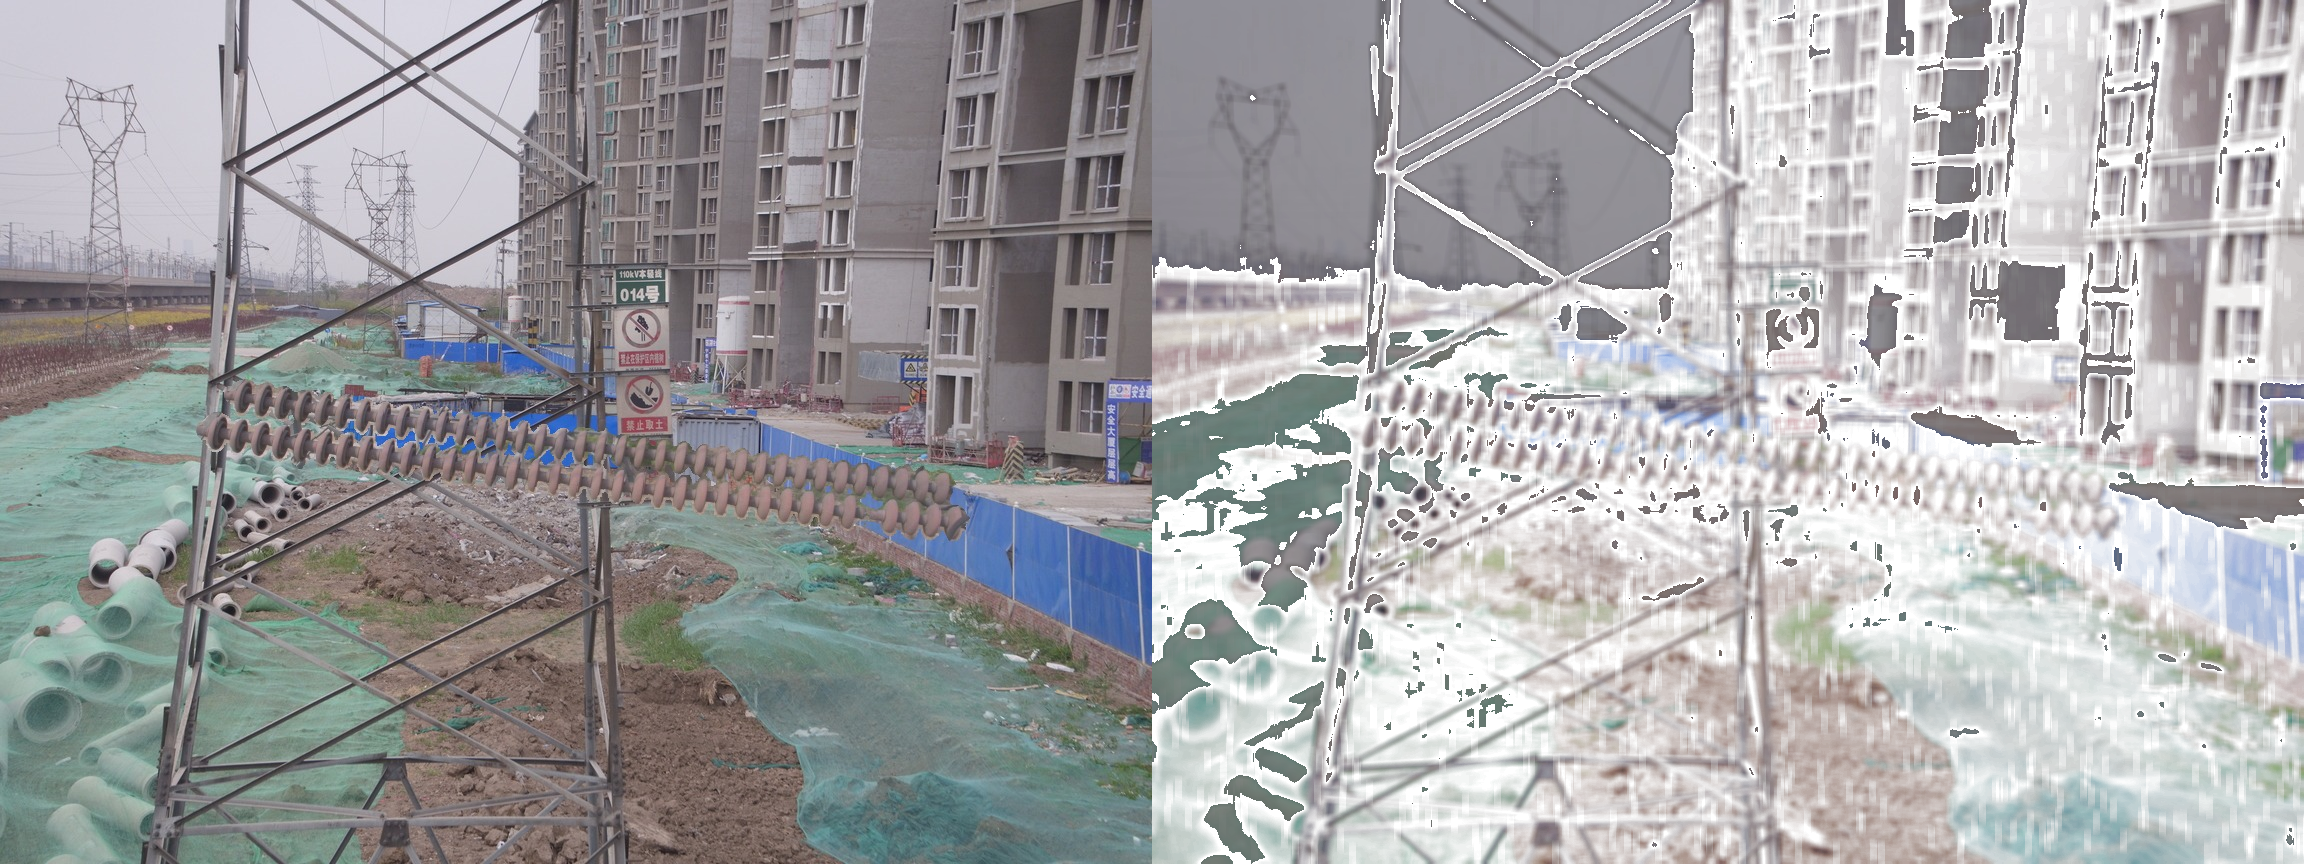

In [3]:
# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("../CPLID/Defective_Insulators/images/000.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]
# plt.imshow(transformed_image)
Image.fromarray(np.hstack((image, transformed_image)))
# cv2.imwrite('albu.jpg',transformed_image)

In [26]:
# image = cv2.imread('../image/cat_dog.jpeg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
# BOX_COLOR = (255, 0, 0) # Red
# TEXT_COLOR = (255, 255, 255) # White

# # coco
# def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
#     """Visualizes a single bounding box on the image"""
#     x_min, y_min, w, h = bbox
#     x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

#     cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

#     ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
#     cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
#     cv2.putText(
#         img,
#         text=class_name,
#         org=(x_min, y_min - int(0.3 * text_height)),
#         fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#         fontScale=0.35,
#         color=TEXT_COLOR,
#         lineType=cv2.LINE_AA,
#     )
#     return img


# def visualize(image, bboxes, category_ids, category_id_to_name):
#     img = image.copy()
#     for bbox, category_id in zip(bboxes, category_ids):
#         class_name = category_id_to_name[category_id]
#         img = visualize_bbox(img, bbox, class_name)
#     plt.figure(figsize=(12, 12))
#     plt.axis('off')
#     plt.imshow(img)

In [ ]:
# bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
# category_ids = [17, 18]

# # We will use the mapping from category_id to the class name
# # to visualize the class label for the bounding box on the image
# category_id_to_name = {17: 'cat', 18: 'dog'}

# # visualize(image, bboxes, category_ids, category_id_to_name)
# transform = A.Compose(
#     [A.HorizontalFlip(p=0.5)],
#     bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
# )
# random.seed(7)
# transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)

# visualize(
#     transformed['image'],
#     transformed['bboxes'],
#     transformed['category_ids'],
#     category_id_to_name,
# )


In [4]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

import xml.etree.ElementTree as ET
#分析xml树，取出w_image、h_image
def xmltobbox(file):
    tree = ET.parse(file)
    root = tree.getroot()
    size = root.find('size')
    w_image = float(size.find('width').text)
    h_image = float(size.find('height').text)
    #继续提取有效信息来计算txt中的四个数据
    for obj in root.iter('object'):
        #将类型提取出来，不同目标类型不同，本文仅有一个类别->0
        class_name = obj.find('name').text
        class_names = [class_name]
        xmlbox = obj.find('bndbox')
        x_min = float(xmlbox.find('xmin').text)
        x_max = float(xmlbox.find('xmax').text)
        y_min = float(xmlbox.find('ymin').text)
        y_max = float(xmlbox.find('ymax').text)
        bboxes = [x_min,y_min,x_max,y_max]
    return class_names,bboxes

def convert_to_int(list):
    result = []
    for item in list:
        result.append(int(item))
    return result

# voc
def visualize_bbox(img, bbox, class_name,color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    bbox = convert_to_int(bbox)
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]),color, thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (bbox[0], bbox[1]- int(1.3 * text_height)), (bbox[0] + text_width, bbox[1]), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(bbox[0], bbox[1] - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, class_names):
    img = image.copy()
    for bbox, class_name in zip(bboxes, class_names):
        # print(bbox)
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

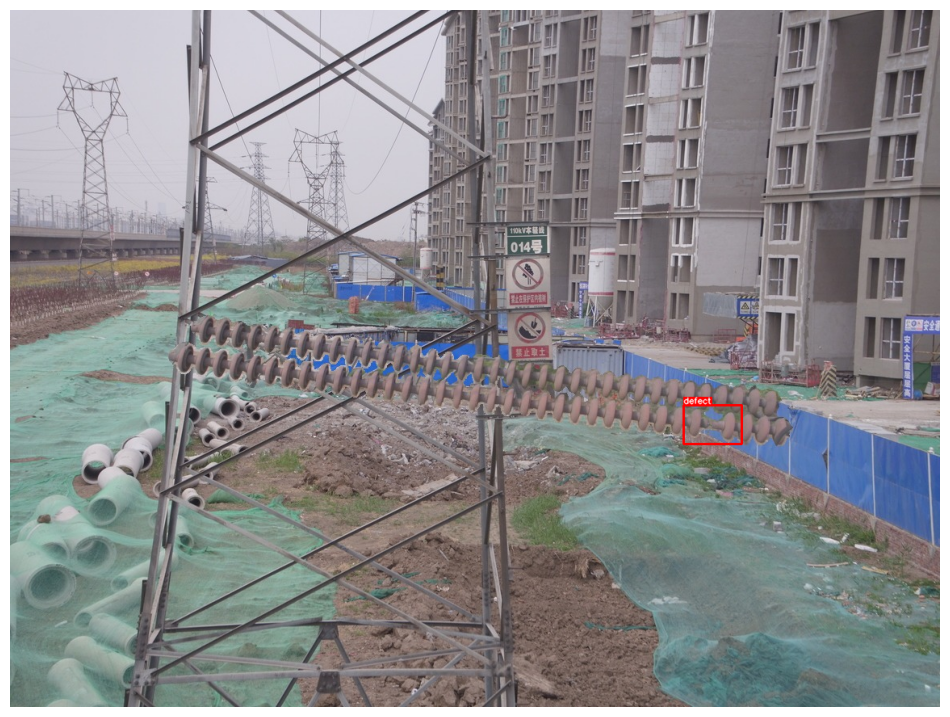

In [5]:
image = cv2.imread('../CPLID/Defective_Insulators/images/000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

file = '../CPLID/Defective_Insulators/labels/defect/000.xml'
class_names,bboxes = xmltobbox(file)
bboxes = [bboxes]

# 原图可视化
visualize(image,bboxes,class_names)

['defect']
[[834.0, 490.0, 906.0, 538.0]]
[(834.0, 490.0, 906.0, 538.0)]


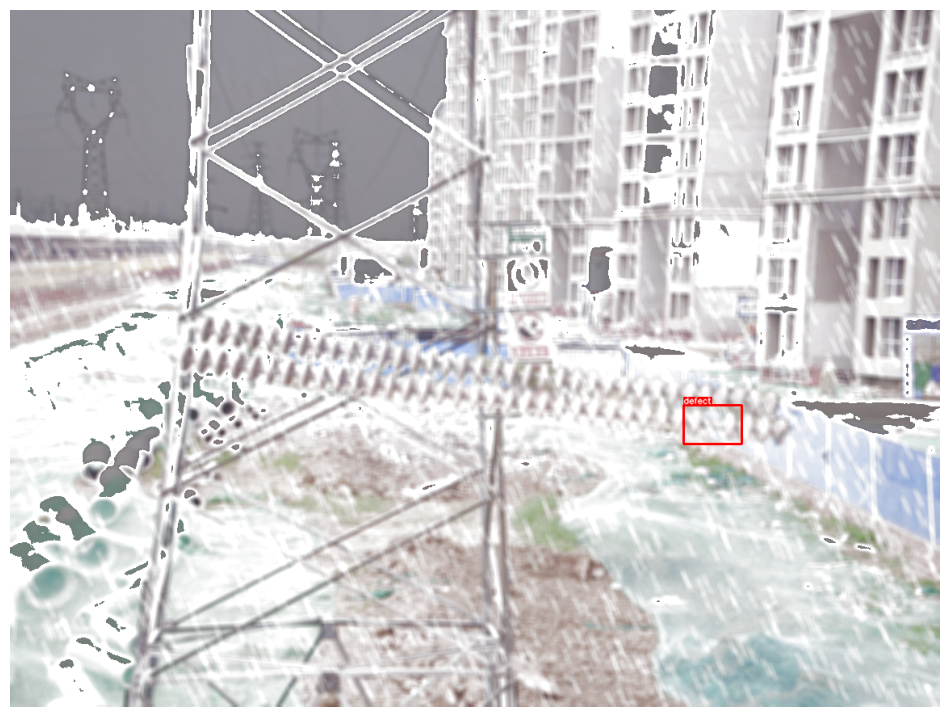

In [8]:
# 对图增强
transform = A.Compose([
    # A.RandomFog(fog_coef_lower=0.1),
    A.RandomRain(),
    A.RandomSnow(),

    A.Blur(p=0.01),
    A.MedianBlur(p=0.01),
    A.ToGray(p=0.01),
    A.CLAHE(p=0.01),
    A.RandomBrightnessContrast(p=0.0),
    A.RandomGamma(p=0.0),
    A.ImageCompression(quality_lower=75, p=0.0),
],
    bbox_params=A.BboxParams(format='pascal_voc',label_fields=['class_names']),
)

# random.seed(7)
transformed = transform(image=image, bboxes=bboxes, class_names=class_names)
print(class_names)
print(bboxes)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['class_names'],
)
print(transformed['bboxes'])

[(245.99999999999994, 490.0, 317.99999999999994, 538.0)]


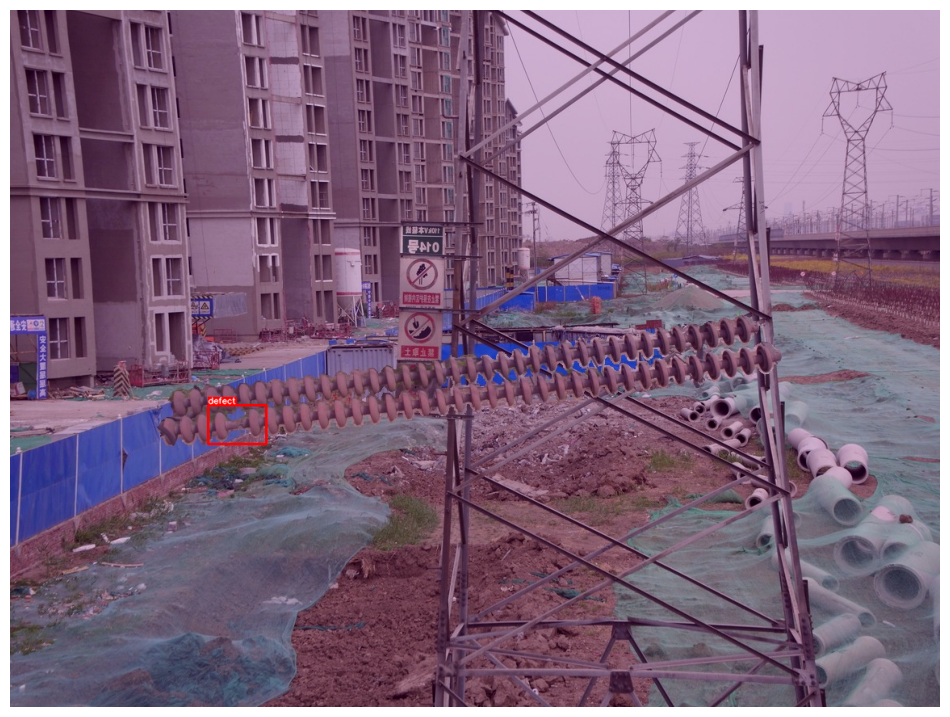

In [67]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_names']),
)
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, class_names=class_names)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['class_names'],
)
print(transformed['bboxes'])

If you don't pass the min_area and min_visibility parameters, Albumentations will use 0 as a default value for them.
https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

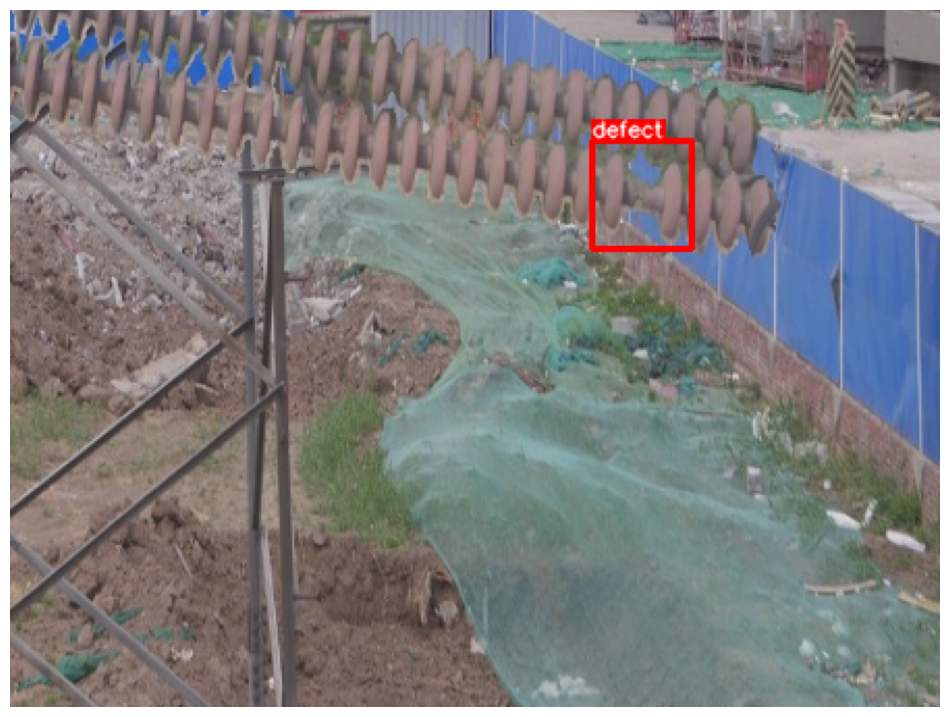

In [8]:
transform = A.Compose(
    [A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2)],
    bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3,label_fields=['class_names']),
)
random.seed(7)
# random.seed(3)
# random.seed(444)
transformed = transform(image=image, bboxes=bboxes, class_names=class_names)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['class_names'],
)